<a href="https://colab.research.google.com/github/NopeSieun/machine_learning_pracrice/blob/main/thresholding_idea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive #드라이브 끌어오기 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray, rgba2rgb #필요한 패키지 import

[[  0   0   0 ...  20  23  23]
 [  0   0   0 ...  20  23  23]
 [  0   0   0 ...  18  19  19]
 ...
 [186 186 186 ... 241 250 250]
 [186 186 186 ... 241 250 250]
 [186 186 186 ... 241 250 250]]
(533, 566)


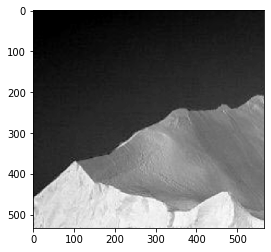

In [ ]:
img = plt.imread('/content/drive/MyDrive/DIgital_image/iceberg.tif') #tif이미지 불러오기 
plt.imshow(img, cmap='gray') #흑백처리
img1 = np.array(img) #2d array
print(img1)
print(img1.shape) #shape 확인

In [ ]:
#histogram anallysis를 위한 256*2 matrix 생성 

list_ = np.array(range(256))#첫 번째 column은 0부터 255까지의 숫자가 들어감

cnt = []
cnt1 = []
#두 번째 column은 각각의 숫자에 해당하는 pixel의 개수가 들어감 -> for문 활용 
for i in img1:
  for j in i: #이중 for문사용(img1이 2차원 array이기 때문)
    cnt.append(j)

for i in range(256): #for문을 이용해 0~255까지의 원소 개수 count
  t = cnt.count(i)
  cnt1.append(t) #빈 list에 count값 순서대로 채워넣기 

cnt2 = np.stack((list_,cnt1), axis=0) #256*2 matrix 생성 
print(cnt2)

[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45   46   47   48   49   50   51   52   53   54   55
    56   57   58   59   60   61   62   63   64   65   66   67   68   69
    70   71   72   73   74   75   76   77   78   79   80   81   82   83
    84   85   86   87   88   89   90   91   92   93   94   95   96   97
    98   99  100  101  102  103  104  105  106  107  108  109  110  111
   112  113  114  115  116  117  118  119  120  121  122  123  124  125
   126  127  128  129  130  131  132  133  134  135  136  137  138  139
   140  141  142  143  144  145  146  147  148  149  150  151  152  153
   154  155  156  157  158  159  160  161  162  163  164  165  166  167
   168  169  170  171  172  173  174  175  176  177  178  179  180  181
   182  183  184  185  186  187  188  189  190  191  192  193  1

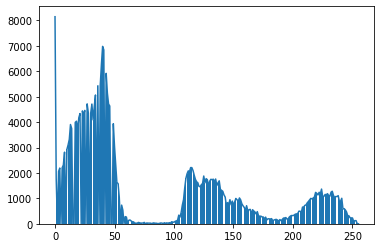

In [ ]:
plt.bar(cnt2[0],cnt2[1]) #위에서 만든 array를 활용해 histogram 나타내기 
plt.plot(cnt2[0],cnt2[1]) #bar차트 위세 line차트 같이 그리기 
plt.show()

In [ ]:
#multiple thresholding 
newcnt = cnt2[1]
newcnt2 = [] #mean thresholding img 만들기 위한 빈 리스트 생성
newcnt3 = [] #median thresholding img 만들기 위한 빈 리스트 생성

#1.평균값 찾기
avg = sum(newcnt)/len(newcnt)
print(avg)

#평균값 기준으로 thresholding
for i in newcnt:
  if i>=avg:
    newcnt2.append(1)
  else:
    newcnt2.append(0)
npcnt2 = np.array(newcnt2)
print(npcnt2)
thres_avg = 256 - sum(npcnt2) - 1 #1의 위치를 파악해서 1이 시작되는 곳을 기준점으로 잡고 thresholding 한다

#2. 중간값 찾기 
newcnt.sort() #array 오름차순 정렬
idx = 0
idx = len(newcnt)//2
median =  (newcnt[idx-1]+newcnt[idx])/2
print(median)

#중간값 기준으로 thresholding
for i in newcnt:
  if i>=median:
    newcnt3.append(1)
  else:
    newcnt3.append(0)
npcnt3 = np.array(newcnt3)
print(npcnt3)
thres_median = 256 - sum(npcnt3) - 1 #1의 위치를 파악해서 1이 시작되는 곳을 기준점으로 잡고 thresholding 한다


1178.4296875
[1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1
 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 1 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
684.5
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 

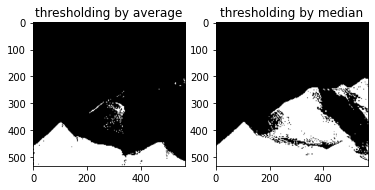

In [ ]:
#avg를 기준으로 thresholding new matrix 만들기
thres_avg_list = []

for i in img1:
  for j in i: #img1이 2d array이므로 이중 for문 사용하기 
    if j>=thres_avg:
      thres_avg_list.append(1) #기준값 기준으로 더 크면 1, 더 작으면 0을 할당한다
    else:
      thres_avg_list.append(0)

thres_avg_list = np.array(thres_avg_list) 
thres_avg_list = thres_avg_list.reshape(img1.shape) #img1과 같은 array형태로 만들어줘야함
           
#median을 기준으로 thresholding new matrix 만들기 -> avg와 같은 방법 사용
thres_median_list = []

for i in img1:
  for j in i:
    if j>=thres_median:
      thres_median_list.append(1)
    else:
      thres_median_list.append(0)

thres_median_list = np.array(thres_median_list)
thres_median_list = thres_median_list.reshape(img1.shape)

plt.subplot(121)
plt.title('thresholding by average')
plt.imshow(thres_avg_list, cmap='gray') #result

plt.subplot(122)
plt.title('thresholding by median')
plt.imshow(thres_median_list, cmap='gray') #result

In [ ]:
#meanfiltering 이용해 노이즈 제거 

def MyMeanFilter(I, n): #(I,n) n에 커널 사이즈 집어넣을 수 있도록 구현한 mean filtering 함수
  y = np.shape(I) #잡음img 불러오기(array)
  filter_size=(n,n) #filter size 원하는 수 넣을 수 있도록 설정
  y_shape = tuple(np.int64((np.array(y)-np.array(filter_size)))) #tuple형태로 변환해서 사용
  result = np.zeros(y_shape)#shape 맞춰 0채운 array 반환

  for i in np.arange(1,y_shape[0]-1):
    for j in np.arange(1,y_shape[1]-1):
      search = I[i:i+filter_size[0],j:j+filter_size[1]] 
      search = np.sort(search.ravel()) #평평하게 만든 후 정렬해주기 (revel() 사용)
      result[i,j] = search[int(sum(search)/len(search))] #결과, 평균값 도출
  return result #반환

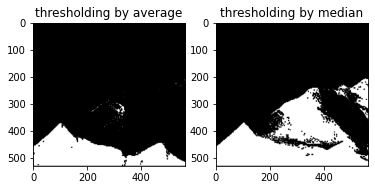

In [ ]:
#최종결과 확인

g3_median_avg = MyMeanFilter(thres_avg_list, 3)
g3_median_median = MyMeanFilter(thres_median_list, 3)

plt.subplot(121)
plt.title('thresholding by average')
plt.imshow(g3_median_avg,cmap='gray') #result

plt.subplot(122)
plt.title('thresholding by median')
plt.imshow(g3_median_median, cmap='gray') #result